In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

taxi=pd.read_csv('3_taxi_peru.csv',encoding='windows-1251', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type            start_at     start_lat     start_lon  \
0  executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1  executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2  executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3  executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4  executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   

               end_at       end_lat       end_lon  end_state driver_start_lat  \
0 2010-11-16 17:29:00  -12,05537033   -77,0413208   drop off     -12,10825481   
1 2010-06-01 00:37:00  -12,12465668  -77,02886963  not found              NaN   
2 2010-05-31 05:04:00  -12,13883209  -76,99530029  not found              NaN   
3 2010-06-01 00:32:00  -12,12458801  -77,02896118  not found              NaN   
4 2010-09-12 01:07:00  -12,02223206  -77,10638428   drop off     -12,08311558   

  driver_start_lon          arrived_at  source  driver_score  rider_score  
0      -77,0272739 2010-11-16 17:02:00  iPhone           5.0          5.0  
1              NaN                 NaT  iPhone           NaN          NaN  
2              NaN                 NaT  iPhone           NaN          NaN  
3              NaN                 NaT  iPhone           NaN          NaN  
4      -76,9277072 2010-09-11 23:50:00  iPhone           4.0          5.0

In [3]:
#find max counts of orders and sum of all orders

a=max(taxi.source.value_counts())
b=sum(taxi.source.value_counts())
a, b

(9741, 22988)

In [4]:
#find percent max orders to all orders in repcent with round
max_order_in_percent = round(max(taxi.source.value_counts())*100/sum(taxi.source.value_counts()))
max_order_in_percent

42

In [5]:
'''Проверим, как распределены оценки водителей (driver_score).
Считаем частоту встречаемости каждой из оценок
Переводим в проценты и округляем до 2 знаков после точки (.mul(100).round(2))
Переименовываем колонки в driver_score и percentage
Сортируем по driver_score в порядке возрастания (от 0 до 5)
Записываем результат в driver_score_counts
'''
driver_score_counts = taxi.driver_score.value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns = {'index':'driver_score', 'driver_score':'percentage'}) \
    .sort_values('driver_score')
driver_score_counts

driver_score  percentage
2           0.0       14.30
4           1.0        1.23
5           2.0        0.81
3           3.0        2.97
1           4.0       21.88
0           5.0       58.81

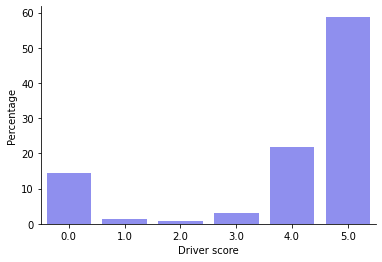

In [6]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

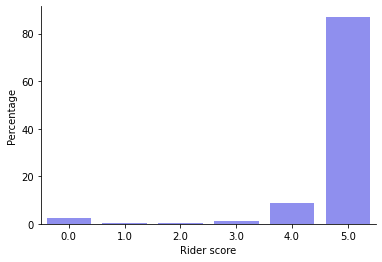

In [7]:
#повторяем тоже самое для оценок клиентов
rider_score_counts = taxi.rider_score.value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns = {'index':'rider_score', 'rider_score':'percentage'}) \
    .sort_values('rider_score')
rider_score_counts
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [8]:
taxi=taxi.query("start_type=='asap' or start_type=='reserved'")
taxi['wait_time']=taxi.arrived_at-taxi.start_at
taxi.wait_time = taxi.wait_time.astype('timedelta64[m]')
taxi.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type            start_at     start_lat     start_lon  \
0  executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1  executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2  executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3  executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4  executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   

               end_at       end_lat       end_lon  end_state driver_start_lat  \
0 2010-11-16 17:29:00  -12,05537033   -77,0413208   drop off     -12,10825481   
1 2010-06-01 00:37:00  -12,12465668  -77,02886963  not found              NaN   
2 2010-05-31 05:04:00  -12,13883209  -76,99530029  not found              NaN   
3 2010-06-01 00:32:00  -12,12458801  -77,02896118  not found              NaN   
4 2010-09-12 01:07:00  -12,02223206  -77,10638428   drop off     -12,08311558   

  driver_start_lon          arrived_at  source  driver_score  rider_score  \
0      -77,0272739 2010-11-16 17:02:00  iPhone           5.0          5.0   
1              NaN                 NaT  iPhone           NaN          NaN   
2              NaN                 NaT  iPhone           NaN          NaN   
3              NaN                 NaT  iPhone           NaN          NaN   
4      -76,9277072 2010-09-11 23:50:00  iPhone           4.0          5.0   

   wait_time  
0       18.0  
1        NaN  
2        NaN  
3        NaN  
4       -5.0

In [9]:
'''Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). 
Опозданием считается время ожидания wait_time > 0.0.
Группируем отфильтрованные данные по driver_id и ищем id водителя,
который опоздал на заказ интересующего нас типа наибольшее число раз'''

taxi.query("wait_time>0 and start_type == 'reserved'") \
    .groupby('driver_id', as_index=True) \
    .agg({'wait_time':'count'}) \
    .idxmax()

wait_time    406921adcca37705ef527b4246c0cfea
dtype: object

In [10]:
#add columns 'month' and 'weekday' from month and weekday from 'start_at'
taxi['month']=taxi['start_at'].dt.month
taxi['weekday']=taxi['start_at'].dt.strftime('%A')

D:\Programm\ju\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

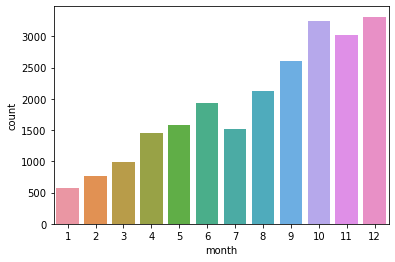

In [11]:
#график числа заказов по месяцам
sns.countplot(taxi.month)

D:\Programm\ju\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

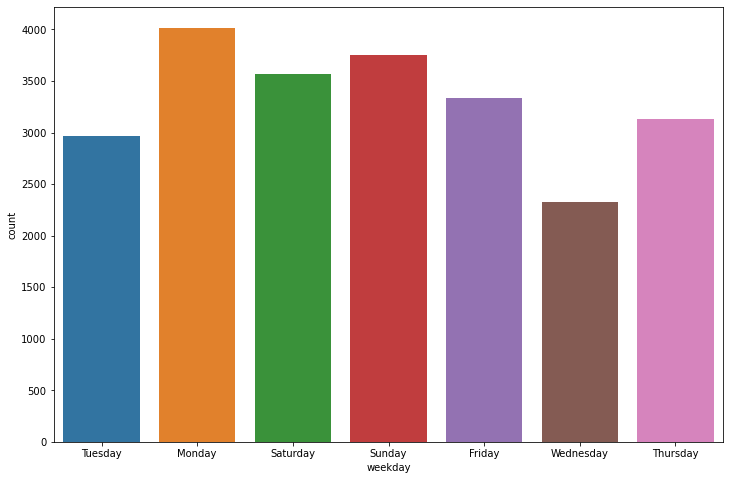

In [12]:
#график числа заказов по дням недели
plt.figure(figsize=(12,8))
sns.countplot(taxi.weekday)

In [13]:
taxi_uniq=taxi.groupby('month', as_index=False).agg({'user_id':'nunique'}).rename(columns={'user_id':'count_uniq_users'})
taxi_uniq

month  count_uniq_users
0       1               102
1       2               110
2       3               162
3       4               253
4       5               275
5       6               309
6       7               318
7       8               377
8       9               416
9      10               437
10     11               504
11     12               569

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count_uniq_users'>

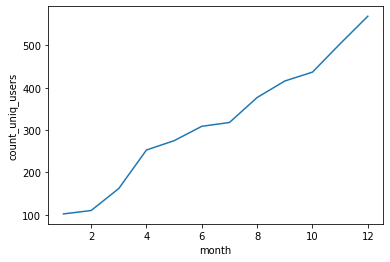

In [18]:
#лайнплот числа уникальных юзеров по месяцам
sns.lineplot(taxi_uniq.month, taxi_uniq.count_uniq_users)